In [1]:
!pip install kloppy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 613.7 kB/s eta 0:00:00


In [2]:
from kloppy import datasets, wyscout
import json
import pandas as pd
import numpy as np
from matplotlib.patches import Arc
import matplotlib.pyplot as plt

In [3]:
def load_json(json_path):
    with open(json_path) as f:
        data = json.load(f)
        matches = pd.json_normalize(data, sep = "_")
    return matches

In [4]:
def drop0var(df):
    """
    param: df, a pandas dataframe
    """
    todrop = (df.var()[df.var() == 0]).index.values
    df = df.drop(todrop, axis=1)
    return df

In [5]:
def create_pitch(length, width, linecolor, bounds = 15):

    """
    mainly stolen from fc python
    param length: an int the length of the field
    param width: an int the height of the field
    param linecolor: the color of the lines
"""
    #Create figure
    fig=plt.figure()
    #fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,width], color=linecolor)
    plt.plot([0,length],[width,width], color=linecolor)
    plt.plot([length,length],[width,0], color=linecolor)
    plt.plot([length,0],[0,0], color=linecolor)
    plt.plot([length/2,length/2],[0,width], color=linecolor)
    plt.fill_between(x = [-bounds, length + bounds],
                     y1 = [width + bounds, width + bounds],
                     y2 = [-bounds, -bounds], color='green')

    #Left Penalty Area
    plt.plot([16.5 ,16.5],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
    plt.plot([0,16.5],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
    plt.plot([16.5,0],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)

    #Right Penalty Area
    plt.plot([(length-16.5),length],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
    plt.plot([(length-16.5), (length-16.5)],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
    plt.plot([(length-16.5),length],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)

    #Left 5-meters Box
    plt.plot([0,5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
    plt.plot([5.5,5.5],[(width/2+7.32/2+5.5),(width/2-7.32/2-5.5)],color=linecolor)
    plt.plot([5.5,0.5],[(width/2-7.32/2-5.5),(width/2-7.32/2-5.5)],color=linecolor)

    #Right 5-meters Box
    plt.plot([length,length-5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
    plt.plot([length-5.5,length-5.5],[(width/2+7.32/2+5.5),width/2-7.32/2-5.5],color=linecolor)
    plt.plot([length-5.5,length],[width/2-7.32/2-5.5,width/2-7.32/2-5.5],color=linecolor)

    #Prepare Circles
    centreCircle = plt.Circle((length/2,width/2),9.15,color=linecolor,fill=False)
    centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
    leftPenSpot = plt.Circle((11,width/2),0.8,color=linecolor)
    rightPenSpot = plt.Circle((length-11,width/2),0.8,color=linecolor)

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    leftArc = Arc((11,width/2),height=18.3,width=18.3,angle=0,theta1=308,theta2=52,color=linecolor)
    rightArc = Arc((length-11,width/2),height=18.3,width=18.3,angle=0,theta1=128,theta2=232,color=linecolor)

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    #Axis titles
    #Tidy Axes
    plt.axis('off')

    return fig,ax


In [6]:
def map_players(x):
    try:
        return player_map[x]
    except:
        return "None"

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
length = 105
width = 68

In [8]:
def map_length(x):
    return x*length

def map_width(x):
    return x*width

In [9]:
manu_westham = datasets.load('wyscout', match_id = 2499724)
matchdf = manu_westham.to_pandas()

In [10]:
matches_json = '../input/being-difficult/matches_England.json'
players_json = '../input/being-difficult/players.json'
matches = load_json(matches_json)
players = load_json(players_json)

In [11]:
player_map = {}
for index, player in players.iterrows():
    player_map[str(player.wyId)] = player.firstName + " " + player.lastName 

In [12]:
matchdf['x'] = matchdf['coordinates_x'].apply(map_length)
matchdf['y'] = matchdf['coordinates_y'].apply(map_width)
matchdf['end_x'] = matchdf['end_coordinates_x'].apply(map_length)
matchdf['end_y'] = matchdf['end_coordinates_y'].apply(map_width)

In [13]:
alldf = []
for match in matches.wyId.unique():
    try:
        df = datasets.load('wyscout', match_id = match).to_pandas()
        df = df[df.event_type =='PASS']
        alldf.append(df)
    except:
        continue

In [14]:
allpasses = pd.concat(alldf)

In [15]:
matches = drop0var(matches)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


In [16]:
matchdf

,event_id,event_type,result,success,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,...,is_counter_attack,pass_type,set_piece_type,body_part_type,goalkeeper_action_type,card_type,x,y,end_x,end_y
0,178494347,PASS,COMPLETE,True,1,5.546151,None,None,None,1611,...,False,SIMPLE_PASS,NaN,NaN,NaN,NaN,52.50,35.36,42.00,29.92
1,178494348,PASS,COMPLETE,True,1,6.708916,None,None,None,1611,...,False,SIMPLE_PASS,NaN,NaN,NaN,NaN,42.00,29.92,34.65,51.00
2,178494349,PASS,COMPLETE,True,1,9.612072,None,None,None,1611,...,False,SIMPLE_PASS,NaN,NaN,NaN,NaN,34.65,51.00,44.10,51.68
3,178494350,PASS,COMPLETE,True,1,10.718877,None,None,None,1611,...,False,SIMPLE_PASS,NaN,NaN,NaN,NaN,44.10,51.68,29.40,24.48
4,178494351,PASS,COMPLETE,True,1,12.728071,None,None,None,1611,...,False,SIMPLE_PASS,NaN,NaN,NaN,NaN,29.40,24.48,35.70,8.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,178496018,RECOVERY,None,None,2,2862.313235,None,None,None,1633,...,False,NaN,NaN,NaN,NaN,NaN,5.25,23.80,NaN,NaN
1642,178496019,BALL_OUT,None,None,2,2866.414500,None,None,None,1633,...,False,NaN,NaN,NaN,NaN,NaN,6.30,0.00,NaN,NaN
1643,178495982,PASS,COMPLETE,True,2,2879.021252,None,None,None,1611,...,False,HAND_PASS,THROW_IN,NaN,NaN,NaN,93.45,68.00,97.65,61.88
1644,178496020,TAKE_ON,None,None,2,2883.667683,None,None,None,1633,...,False,NaN,NaN,NaN,NaN,NaN,7.35,6.12,NaN,NaN


In [17]:
matchdf = drop0var(matchdf)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


In [18]:
for col in matchdf.columns:
    print(col)

event_id
event_type
result
success
period_id
timestamp
end_timestamp
ball_state
ball_owning_team
team_id
player_id
coordinates_x
coordinates_y
end_coordinates_x
end_coordinates_y
receiver_player_id
is_counter_attack
pass_type
set_piece_type
body_part_type
goalkeeper_action_type
card_type
x
y
end_x
end_y


In [19]:
matchdf.event_type

0           PASS
1           PASS
2           PASS
3           PASS
4           PASS
          ...   
1641    RECOVERY
1642    BALL_OUT
1643        PASS
1644     TAKE_ON
1645     TAKE_ON
Name: event_type, Length: 1646, dtype: object

In [20]:
# passes = matchdf[matchdf.event_type == "PASS"]
passes = allpasses

In [21]:
passes['x'] = passes['coordinates_x'].apply(map_length)
passes['y'] = passes['coordinates_y'].apply(map_width)

In [22]:
passes.team_id.iloc[0]

'1659'

In [23]:
def plot_event(df):
    create_pitch(length, width, 'white')
    first_team = df.team_id.iloc[0]
    for index, p in df.iterrows():
        color = 'red' if p.team_id == first_team else 'blue'
        x = p.x
        y = p.y
        plt.scatter(x, y, color = color)

    plt.show()

In [24]:
# plot_event(passes)

In [25]:
players.columns

Index(['weight', 'firstName', 'middleName', 'lastName', 'currentTeamId',
       'birthDate', 'height', 'wyId', 'foot', 'shortName',
       'currentNationalTeamId', 'passportArea_name', 'passportArea_id',
       'passportArea_alpha3code', 'passportArea_alpha2code', 'role_code2',
       'role_code3', 'role_name', 'birthArea_name', 'birthArea_id',
       'birthArea_alpha3code', 'birthArea_alpha2code'],
      dtype='object')

In [26]:
players[players.wyId == 7906]

,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,wyId,foot,shortName,...,passportArea_id,passportArea_alpha3code,passportArea_alpha2code,role_code2,role_code3,role_name,birthArea_name,birthArea_id,birthArea_alpha3code,birthArea_alpha2code
2900,63,Juan Manuel,,Mata Garc\u00eda,1611,1988-04-28,170,7906,left,Juan Mata,...,724,ESP,ES,MD,MID,Midfielder,Spain,724,ESP,ES


In [27]:
matchdf.player_id

0         7906
1       105338
2        70122
3         7936
4         7918
         ...  
1641      8301
1642      None
1643      None
1644     14703
1645      None
Name: player_id, Length: 1646, dtype: object

In [28]:
matchdf['player_name'] = matchdf.player_id.apply(map_players)

In [29]:
matchdf[['event_type', 'player_id', 'player_name', 'timestamp']]

,event_type,player_id,player_name,timestamp
0,PASS,7906,Juan Manuel Mata Garc\u00eda,5.546151
1,PASS,105338,Henrikh Mkhitaryan,6.708916
2,PASS,70122,Nemanja Mati\u0107,9.612072
3,PASS,7936,Paul Pogba,10.718877
4,PASS,7918,Phil Jones,12.728071
...,...,...,...,...
1641,RECOVERY,8301,Joe Hart,2862.313235
1642,BALL_OUT,None,None,2866.414500
1643,PASS,None,None,2879.021252
1644,TAKE_ON,14703,Marko Arnautovi\u0107,2883.667683


In [30]:
passes[['coordinates_x', 'coordinates_y']].max()

coordinates_x    1.0
coordinates_y    1.0
dtype: float64

In [31]:
passes[['coordinates_x', 'coordinates_y']].min()

coordinates_x    0.0
coordinates_y    0.0
dtype: float64

In [32]:
shots = matchdf[matchdf.event_type == 'SHOT']

In [33]:
for i, s in shots.iterrows():
    print(s)
    break

event_id                           178494555
event_type                              SHOT
result                            OFF_TARGET
success                                False
period_id                                  1
timestamp                         665.816769
end_timestamp                           None
ball_state                              None
ball_owning_team                        None
team_id                                 1611
player_id                             105338
coordinates_x                           0.89
coordinates_y                            0.7
end_coordinates_x                        0.0
end_coordinates_y                        0.0
receiver_player_id                       NaN
is_counter_attack                      False
pass_type                                NaN
set_piece_type                           NaN
body_part_type                           NaN
goalkeeper_action_type                   NaN
card_type                                NaN
x         

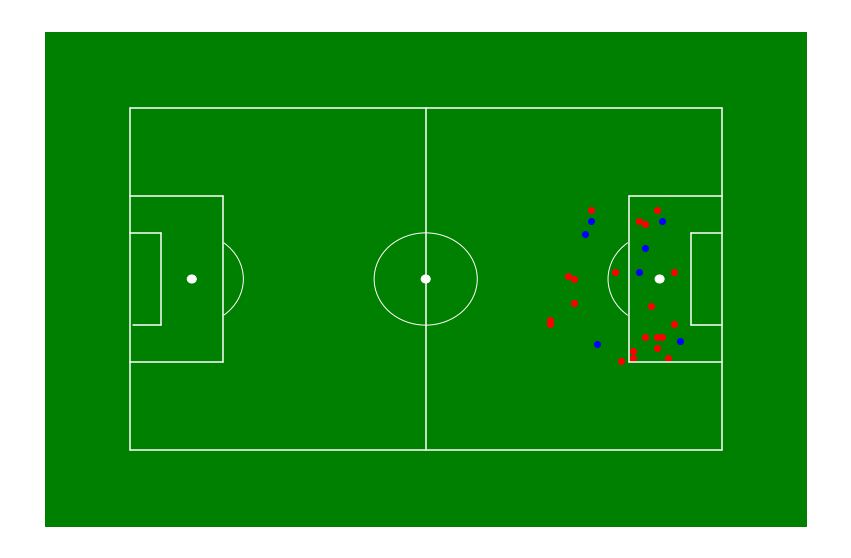

In [34]:
plot_event(shots)

In [35]:
passes.columns

Index(['event_id', 'event_type', 'result', 'success', 'period_id', 'timestamp',
       'end_timestamp', 'ball_state', 'ball_owning_team', 'team_id',
       'player_id', 'coordinates_x', 'coordinates_y', 'end_coordinates_x',
       'end_coordinates_y', 'receiver_player_id', 'is_counter_attack',
       'pass_type', 'body_part_type', 'set_piece_type',
       'goalkeeper_action_type', 'card_type', 'x', 'y'],
      dtype='object')

In [36]:
cluster_cols = ['coordinates_x', 'coordinates_y', 'end_coordinates_x', 'end_coordinates_y']

In [37]:
passes['end_x'] = passes['end_coordinates_x'].apply(map_length)
passes['end_y'] = passes['end_coordinates_y'].apply(map_width)

In [38]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=20,
                              random_state=42,
                              max_iter = 1000,
                              init_params = 'kmeans').fit(passes[cluster_cols])

In [39]:
passes['cluster'] = bgm.predict(passes[cluster_cols])
clusters_ = passes.groupby('cluster').mean()[['x', 'y', 'end_x', 'end_y']]

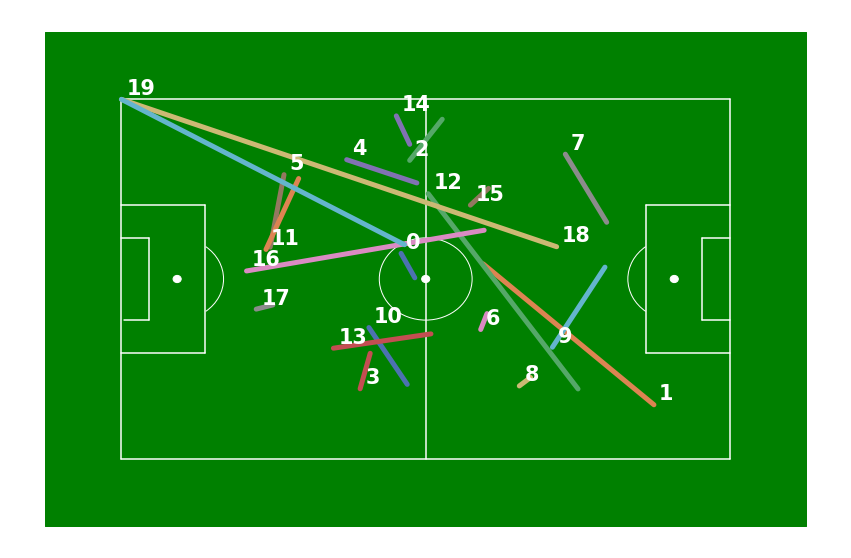

In [40]:
fig, ax = create_pitch(120, 80,'white')
for index, pass_ in clusters_.iterrows():
    if (index < 0):
        continue
    x, y = pass_['x'], pass_['y']
    end_x, end_y = pass_['end_x'], pass_['end_y']
    color = 'blue' 
    y = 80 - y
    end_y = 80 - end_y
    plt.plot([x, end_x], [y, end_y], linewidth = 5)
    plt.text((x+1),y+1,index, color = "white", fontweight = 'bold', fontsize = 'xx-large')
    plt.savefig('gmm_cluster.png')

In [41]:
clusters_.to_csv('pass_clusters.csv', index = False)

In [42]:
passes.columns

Index(['event_id', 'event_type', 'result', 'success', 'period_id', 'timestamp',
       'end_timestamp', 'ball_state', 'ball_owning_team', 'team_id',
       'player_id', 'coordinates_x', 'coordinates_y', 'end_coordinates_x',
       'end_coordinates_y', 'receiver_player_id', 'is_counter_attack',
       'pass_type', 'body_part_type', 'set_piece_type',
       'goalkeeper_action_type', 'card_type', 'x', 'y', 'end_x', 'end_y',
       'cluster'],
      dtype='object')

In [43]:
passes['ball_state']

0       None
1       None
2       None
3       None
4       None
        ... 
1738    None
1740    None
1741    None
1742    None
1745    None
Name: ball_state, Length: 358718, dtype: object

In [44]:
passes.to_csv('fullpasses.csv', index = False)

In [45]:
passes.columns

Index(['event_id', 'event_type', 'result', 'success', 'period_id', 'timestamp',
       'end_timestamp', 'ball_state', 'ball_owning_team', 'team_id',
       'player_id', 'coordinates_x', 'coordinates_y', 'end_coordinates_x',
       'end_coordinates_y', 'receiver_player_id', 'is_counter_attack',
       'pass_type', 'body_part_type', 'set_piece_type',
       'goalkeeper_action_type', 'card_type', 'x', 'y', 'end_x', 'end_y',
       'cluster'],
      dtype='object')

In [46]:
passes.groupby(['cluster', 'team_id']).size().reset_index()

,cluster,team_id,0
0,0,10531,1619
1,0,1609,3264
2,0,1610,2918
3,0,1611,2501
4,0,1612,3274
...,...,...,...
395,19,1644,121
396,19,1646,157
397,19,1651,150
398,19,1659,159


In [47]:
passes.shape

(358718, 27)

In [48]:
with open('../input/football-event-data/teams.json') as f:
    teams_json = json.load(f)
    teams_df = pd.json_normalize(teams_json)

In [49]:
teams_df

,city,name,wyId,officialName,type,area.name,area.id,area.alpha3code,area.alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
4,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES
...,...,...,...,...,...,...,...,...,...
137,Las Rozas,Spain,1598,Spain,national,Spain,724,ESP,ES
138,Beograd,Serbia,17322,Serbia,national,Serbia,688,SRB,RS
139,Bern,Switzerland,6697,Switzerland,national,Switzerland,756,CHE,CH
140,Warszawa,Poland,13869,Poland,national,Poland,616,POL,PL


In [50]:
teams_map = dict(zip(teams_df.wyId, teams_df.officialName))
passes['team'] = passes['team_id'].astype(int).map(teams_map)

In [51]:
teams_map[10531]

'Swansea City AFC'

In [52]:
passes['team']

0         AFC Bournemouth
1         AFC Bournemouth
2         AFC Bournemouth
3         AFC Bournemouth
4         AFC Bournemouth
              ...        
1738    Leicester City FC
1740    Leicester City FC
1741    Leicester City FC
1742           Arsenal FC
1745    Leicester City FC
Name: team, Length: 358718, dtype: object

In [53]:
passes[(passes.coordinates_x < 0.01) & (passes.coordinates_y < 0.01)][['end_coordinates_x', 'end_coordinates_y']].describe()

,end_coordinates_x,end_coordinates_y
count,2741.000000,2741.000000
mean,0.532039,0.476454
std,0.198678,0.289966
min,0.000000,0.000000
25%,0.430000,0.220000
50%,0.610000,0.450000
75%,0.670000,0.740000
max,1.000000,1.000000


In [54]:
team_clusters = passes.groupby(['cluster', 'team']).size().reset_index().sort_values(by=['cluster', 0], ascending=[True, False])
team_clusters.columns = ['cluster', 'team', 'passes']

In [55]:
team_clusters.head()

,cluster,team,passes
10,0,Manchester City FC,4006
9,0,Liverpool FC,3274
1,0,Arsenal FC,3264
16,0,Tottenham Hotspur FC,3236
4,0,Chelsea FC,2918


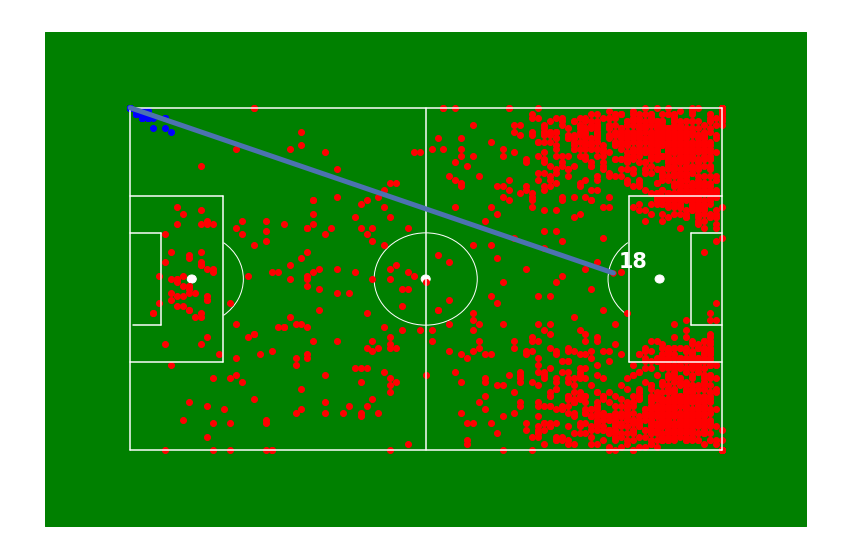

In [56]:
cluster = 18
fig, ax = create_pitch(105, 68,'white')
plt.scatter(passes[passes.cluster == cluster]['x'], (68 - passes[passes.cluster == cluster]['y']), c='red')
plt.scatter(passes[passes.cluster == cluster]['end_x'], (68 - passes[passes.cluster == cluster]['end_y']), c='blue')
for index, pass_ in clusters_.iterrows():
    if (index != cluster):
        continue
    x, y = pass_['x'], pass_['y']
    end_x, end_y = pass_['end_x'], pass_['end_y']
    color = 'blue' 
    y = 68 - y
    end_y = 68 - end_y
    plt.plot([x, end_x], [y, end_y], linewidth = 5)
    plt.scatter(x, y, s=30, c='red')
    plt.text((x+1),y+1,index, color = "white", fontweight = 'bold', fontsize = 'xx-large')
    plt.savefig('gmm_cluster.png')

In [57]:
success_cluster = passes.groupby(['cluster', 'success']).size().reset_index()
success_cluster.columns = ['cluster', 'success', 'score']
success_cluster.head()

,cluster,success,score
0,0,False,4924
1,0,True,36144
2,1,False,615
3,1,True,1232
4,2,False,2656


In [58]:
success_cluster = success_cluster.pivot(index='cluster', columns='success', values = 'score')
success_cluster.columns = ['success', 'fail']
success_cluster['total'] = success_cluster['success'] + success_cluster['fail']  
success_cluster['ratio'] = success_cluster['success'] / success_cluster['total']  

In [59]:
success_cluster

,success,fail,total,ratio
cluster,,,,
0,4924,36144,41068,0.119899
1,615,1232,1847,0.332972
2,2656,22592,25248,0.105196
3,3403,17768,21171,0.160739
4,4282,14300,18582,0.230438
5,1040,19996,21036,0.049439
6,2750,17244,19994,0.137541
7,4682,6333,11015,0.425057
8,2403,11366,13769,0.174522


In [60]:
team_clusters.to_csv('team_clusters.csv', index = False)

In [61]:
success_cluster.to_csv('success_clusters.csv', index = False)